PROYECTO




El total de registros luego de eliminar los nulos [ 1201 ]
Total de Registro para entreno [ 961 ]
Total de Registro para pruebas [ 240 ]


  Variable      Media  ValorMax  ValorMin  DesviacionStan
0        Y  181002.57  755000.0   34900.0        83330.87
1       X1       6.12      10.0       1.0            1.42
2       X2    1155.83    3138.0     334.0          372.53
3       X3       6.50      14.0       2.0            1.62
4       X4    1970.64    2010.0    1875.0           31.53
5       X5      69.96     313.0      21.0           23.47


    Correlacion de Variables 

       Variable  CorrelacionPrecio
0  Calificacion               0.81
1        Tamaño               0.64
2  Habitaciones               0.57
3           Año               0.55
4     Distancia               0.36


La variable con mayor correlacion es
Calificacion con correlacion: 0.81


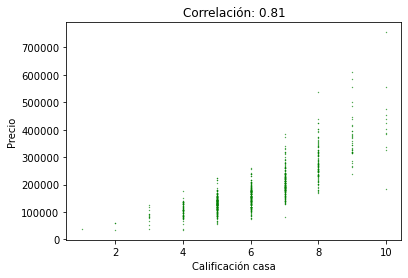

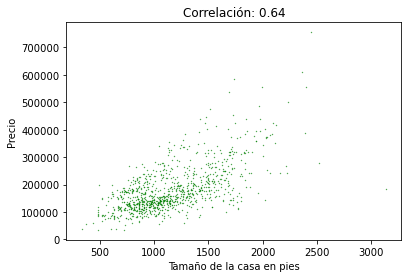

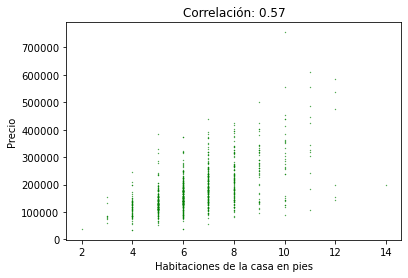

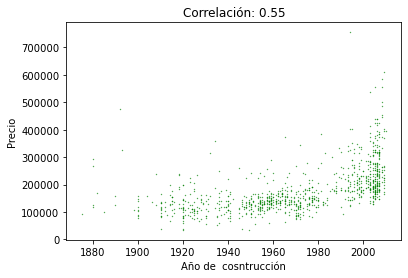

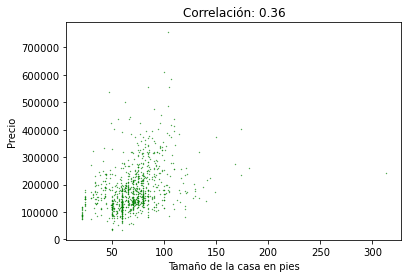

In [1]:

import  pandas  as pd
import  numpy  as  np
import  math as  mt
import  matplotlib.pyplot as plt

class  Regresion():
    
    datos=[] 
    egistros=[]
    
    
    def __int__(self):
       passs

    
    ##analizar si debemos de quita todas la variables  con  
    def lecturaArchivo(self):     
       ##lectura de arhcio 
       data = pd.DataFrame(np.load('data.npy'))    
    
       #Se el cambia el nombre a as columnas 
       data.rename(columns={0:'Precio',1:'Calificacion',2:'Tamaño',3:'Habitaciones',4:'Año',5:'Distancia'}, inplace=True ) 
       return data



    ##funcion para obtener el data set requerido entreno 80% o pruebas  20%  
    def Dataset(self, tdato,data): 
      
        Registros=round(len(data)*0.80)
        
        print  ("El total de registros luego de eliminar los nulos [ " +str(len(data))+" ]") 
        print  ("Total de Registro para entreno [ " +str(Registros) + " ]" ) 
        
        print  ("Total de Registro para pruebas [ " +str(len(data)-Registros) + " ]" ) 
        
        if tdato=='Entreno':           
           resultado =  data[:Registros]           
        else:
            resultado =  data[Registros:]
   
        return    resultado     
    

    
    def CalculoGenerales(self, Registros):
        long=len(Registros)
        Y1 =  np.array(Registros['Precio']).reshape(long,1)
        X1 =  np.array(Registros['Calificacion']).reshape(long,1)
        X2 =  np.array(Registros['Tamaño']).reshape(long,1)    
        X3 =  np.array(Registros['Habitaciones']).reshape(long,1)
        X4 =  np.array(Registros['Año']).reshape(long,1)
        X5 =  np.array(Registros['Distancia']).reshape(long,1)
    
        ##Media variables
        MY1= round(Y1.mean(),2)
        MX1= round(X1.mean(),2)
        MX2= round(X2.mean(),2)
        MX3= round(X3.mean(),2)
        MX4= round(X4.mean(),2)
        MX5= round(X5.mean(),2)

        #Valores MAximos
        MaxY1=np.amax(Y1)
        MaxX1= np.amax(X1)
        MaxX2= np.amax(X2)
        MaxX3= np.amax(X3)
        MaxX4= np.amax(X4)
        MaxX5= np.amax(X5)

        #Valores minimos 
        MinY1=np.amin(Y1)
        MinX1= np.amin(X1)
        MinX2= np.amin(X2)
        MinX3= np.amin(X3)
        MinX4= np.amin(X4)
        MinX5= np.amin(X5)
        
        #Desviacion estandar 
        DesY1= round(np.std(Y1),2)
        DesX1= round(np.std(X1),2)
        DesX2= round(np.std(X2),2)
        DesX3= round(np.std(X3),2)
        DesX4= round(np.std(X4),2)
        DesX5= round(np.std(X5),2)
        
        CalculosGe= pd.DataFrame(  {"Variable":["Y","X1","X2","X3","X4","X5"],
                            "Media":[MY1,MX1,MX2,MX3,MX4,MX5],
                           "ValorMax": [MaxY1,MaxX1,MaxX2,MaxX3,MaxX4,MaxX5],
                           "ValorMin": [MinY1,MinX1,MinX2,MinX3,MinX4,MinX5],
                           "DesviacionStan": [DesY1,DesX1,DesX2,DesX3,DesX4,DesX5]
                           })
        
        ##CalculosGe.rename(index={0:'Y',1:'X1',2:'X2',3:'X3',4:'X4',5:'X5'}, inplace=True)
        print (CalculosGe)
    
    
    def CoeficienteCorrelacion(self, data):
        ##print (data.loc["Precio","Calificacion"])
        
        
        Y1X1= data[['Precio','Calificacion']]    
        Y1X2= data[['Precio','Tamaño']]
        Y1X3= data[['Precio','Habitaciones']]
        Y1X4= data[['Precio','Año']]
        Y1X5= data[['Precio','Distancia']]
        ##data.rename(columns={0:'Precio',1:'Calificacion',2:'CalidaEst',3:'Habitaciones',4:'Año',5:'Distancia'}, inplace=True ) "]
        CoCalifi= pd.DataFrame( Y1X1.corr())
        CoCalida= pd.DataFrame( Y1X2.corr())
        CoHab=    pd.DataFrame( Y1X3.corr())
        CoAños=   pd.DataFrame( Y1X4.corr())
        CoDist=   pd.DataFrame( Y1X5.corr())
        
       
        CoCalifi=   round(CoCalifi.loc['Precio','Calificacion'],2)
        CoCalida=   round(CoCalida.loc['Precio','Tamaño'],2)
        CoHab=      round(CoHab.loc['Precio','Habitaciones'],2)
        CoAños=     round(CoAños.loc['Precio','Año'],2)
        CoDist=     round(CoDist.loc['Precio','Distancia'],2)
        
       
        print ("    Correlacion de Variables \n") 
        Correlacion = pd.DataFrame({'Variable':['Calificacion','Tamaño','Habitaciones',
                                                'Año','Distancia'],
                                    "CorrelacionPrecio":[CoCalifi,CoCalida,CoHab,
                                         CoAños,CoDist]} )
        print(Correlacion)
        
        ##CoMAX=pd.DataFrame().max(Correlacion['Precio'])
        
        
        indiceMAx= Correlacion['CorrelacionPrecio'].idxmax()
        
        Variable =Correlacion.loc[indiceMAx]['Variable']
        CorrVar  =Correlacion.loc[indiceMAx]['CorrelacionPrecio']
        
        print("\n")
        print ("La variable con mayor correlacion es" )
        print (str(Variable) + " con correlacion: " +str(CorrVar))
       
       
        
        plt.scatter(data['Calificacion'],data['Precio'],s=0.1, c='green')
        plt.title( "Correlación: "+ str(Correlacion.loc[0]['CorrelacionPrecio']))
        plt.xlabel('Calificación casa')
        plt.ylabel('Precio')
        plt.show()
        
        plt.scatter(data['Tamaño'],data['Precio'],s=0.1, c='green')
        plt.title( "Correlación: "+ str(Correlacion.loc[1]['CorrelacionPrecio']))
        plt.xlabel('Tamaño de la casa en pies')
        plt.ylabel('Precio')
        plt.show()
        
        plt.scatter(data['Habitaciones'],data['Precio'],s=0.1, c='green')
        plt.title( "Correlación: "+ str(Correlacion.loc[2]['CorrelacionPrecio']))
        plt.xlabel('Habitaciones de la casa en pies')
        plt.ylabel('Precio')
        plt.show()
                
        plt.scatter(data['Año'],data['Precio'],s=0.1, c='green')
        plt.title( "Correlación: "+ str(Correlacion.loc[3]['CorrelacionPrecio']))
        plt.xlabel('Año de  cosntrucción')
        plt.ylabel('Precio')
        plt.show()
                
        plt.scatter(data['Distancia'],data['Precio'],s=0.1, c='green')
        plt.title( "Correlación: "+ str(Correlacion.loc[4]['CorrelacionPrecio']))
        plt.xlabel('Tamaño de la casa en pies')
        plt.ylabel('Precio')
        plt.show()
        
        
        return  str(Variable)
        
    def  Entreno(self, data):
        pass
        
        #Valor= np.cov((data["Calificacion"],data["Precio"]), rowvar=0)
        #print (Valor)
    
reg = Regresion()
data=reg.lecturaArchivo()


##print (data[data["Distancia"].isnull()])##259

##Se considera borrar todos los valores los registros con valor nulo
#de la columna  Distancia que es la unica afectada. 
#Total de registros  1460  total de registros nulos 259
#Total luego de borrar nulos  1201

data.drop(data[data.Distancia.isnull()].index, inplace=True)


print ("\n\n")
Registros=reg.Dataset("Entreno", data)

print ("\n")
reg.CalculoGenerales(Registros)

print ("\n")
Variable=reg.CoeficienteCorrelacion(Registros)
            

reg.Entreno(Registros[['Precio',Variable]])
